# Previsão das melhores notas de matemática do ENEM 2016

## Importando as bibliotecas

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Leitura dos dados e visualização do conteúdo

In [7]:
df = pd.read_csv('test.csv')

In [8]:
# vusualizando 5 entradas do dataframe
df.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [9]:
df.shape

(4576, 47)

In [10]:
# Visualizaçando colunas
list(df.columns)

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

## Análise Exploratória

Nem todas as variáveis são importantes para previsão das melhores notas de matemática

In [11]:
#verificando se existem valores faltantes nos dados
df.isna().any()

NU_INSCRICAO              False
CO_UF_RESIDENCIA          False
SG_UF_RESIDENCIA          False
NU_IDADE                  False
TP_SEXO                   False
TP_COR_RACA               False
TP_NACIONALIDADE          False
TP_ST_CONCLUSAO           False
TP_ANO_CONCLUIU           False
TP_ESCOLA                 False
TP_ENSINO                  True
IN_TREINEIRO              False
TP_DEPENDENCIA_ADM_ESC     True
IN_BAIXA_VISAO            False
IN_CEGUEIRA               False
IN_SURDEZ                 False
IN_DISLEXIA               False
IN_DISCALCULIA            False
IN_SABATISTA              False
IN_GESTANTE               False
IN_IDOSO                  False
TP_PRESENCA_CN            False
TP_PRESENCA_CH            False
TP_PRESENCA_LC            False
CO_PROVA_CN               False
CO_PROVA_CH               False
CO_PROVA_LC               False
CO_PROVA_MT               False
NU_NOTA_CN                 True
NU_NOTA_CH                 True
NU_NOTA_LC                 True
TP_LINGU

In [12]:
#verificando quantos desses valores faltantes são vazios
df.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

In [13]:
# Removendo as linhas em que tem informações faltantes importantes para previsão
# Como os valores faltantes se repetem para algumas variáveis (1134 e 1199), suponho que estejam na mesma linha, sendo assim:  
df.dropna(axis=0, subset=['NU_NOTA_CN','NU_NOTA_LC'],inplace=True)

In [14]:
# Verificando se foram removidas
df.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 2114
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    2114
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                   0
NU_NOTA_CH                   0
NU_NOTA_LC                   0
TP_LINGUA                    0
TP_STATU

In [ ]:
# TP_LINGUA não ajudará a previsão de notas de matemática

In [15]:
#Verificando se há duplicatas
df.duplicated().sum()

0

In [16]:
df.shape

(3360, 47)

In [17]:
#sumário estatistico descritivo para notas de Ciências Naturais
df['NU_NOTA_CN'].describe()

count    3360.000000
mean      473.500655
std        70.678178
min         0.000000
25%       419.775000
50%       458.450000
75%       514.500000
max       778.900000
Name: NU_NOTA_CN, dtype: float64

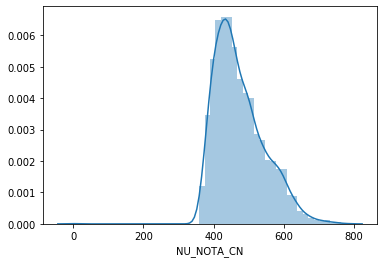

In [18]:
#histograma - Notas Ciências Naturais
sns.distplot(df['NU_NOTA_CN'])

In [19]:
#Sumário estatistico descritivo para notas de Ciências Humanas
df['NU_NOTA_CH'].describe()

count    3360.000000
mean      529.748720
std        72.747219
min       330.600000
25%       480.000000
50%       532.400000
75%       579.800000
max       773.600000
Name: NU_NOTA_CH, dtype: float64

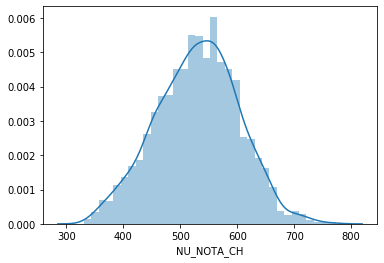

In [20]:
#Histograma - Notas Ciências Humanas
sns.distplot(df['NU_NOTA_CH'])

In [21]:
#Sumário estatistico descritivo para notas de Linguagens e Códigos
df['NU_NOTA_LC'].describe()

count    3360.000000
mean      514.618631
std        67.118345
min         0.000000
25%       468.700000
50%       517.300000
75%       562.400000
max       708.900000
Name: NU_NOTA_LC, dtype: float64

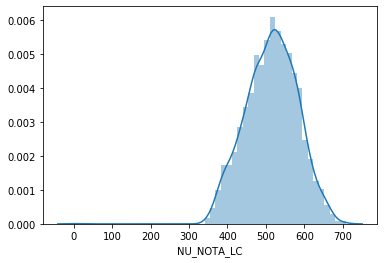

In [22]:
#Histograma - Notas Linguagens e Códigos
sns.distplot(df['NU_NOTA_LC'])

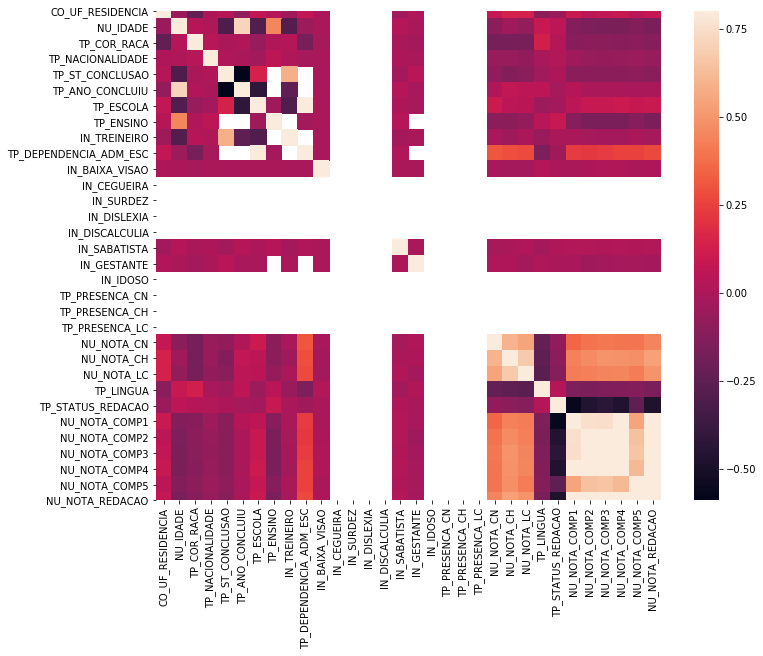

In [25]:
#verificando se existem colunas fortemente correlacionadas
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

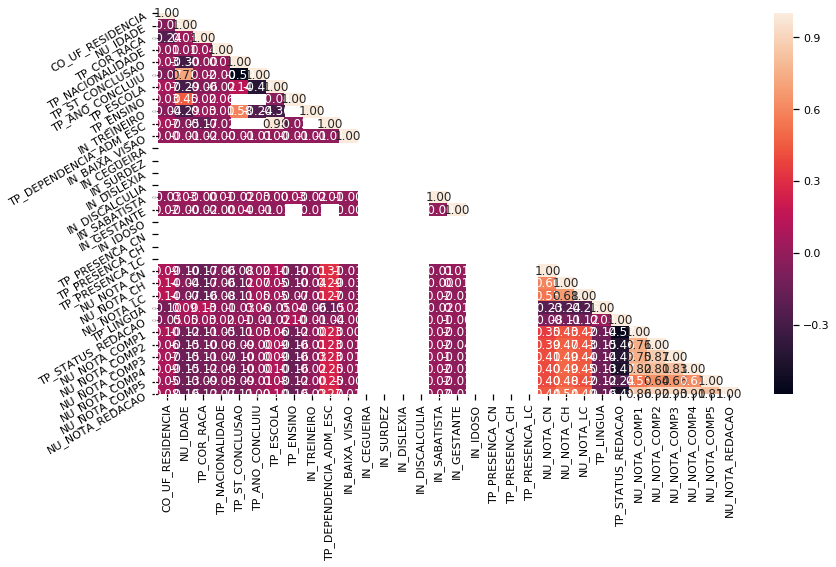

In [28]:
#verificando se existem colunas fortemente correlacionadas
corr = df.corr() #faz a correlação de todos os dados do dataset
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)